In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Activity_Projection_Encoded.csv')

df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,18
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9
2,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [72]:
df1.shape

(10000, 15)

## 1. Prepare training and test data 

In [4]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. Train KNN model

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [139]:
knn.score(X_test, y_test)

0.18

In [140]:
y_pred = knn.predict(X_test)

In [141]:
accuracy_score(y_pred, y_test)

0.18

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[359,   0,   0, ...,   0,   0,   0],
       [ 51,   0,   0, ...,   0,   0,   0],
       [ 57,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0]], dtype=int64)

Text(220.72222222222223, 0.5, 'Truth')

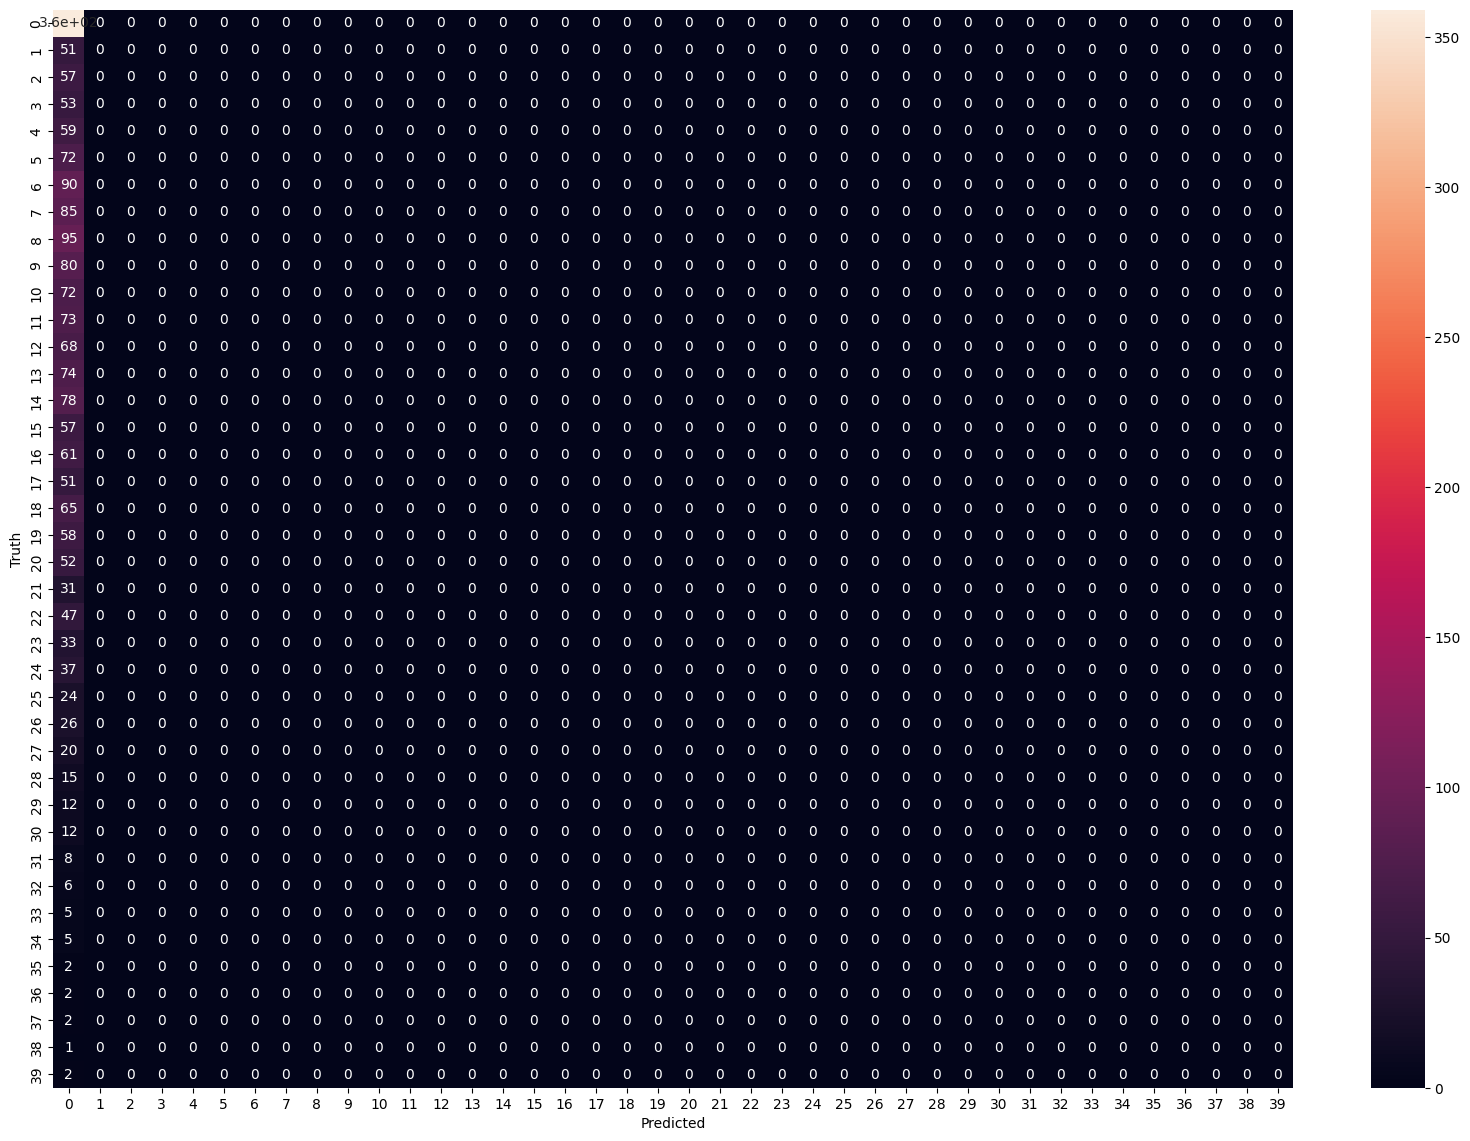

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(20,14))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [180]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30       359
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        85
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        72
          11       0.00      0.00      0.00        73
          12       0.00      0.00      0.00        68
          13       0.00      0.00      0.00        74
          14       0.00      0.00      0.00        78
          15       0.00      0.00      0.00        57
          16       0.00      0.00      0.00        61
          17       0.00    

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### 2.2 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

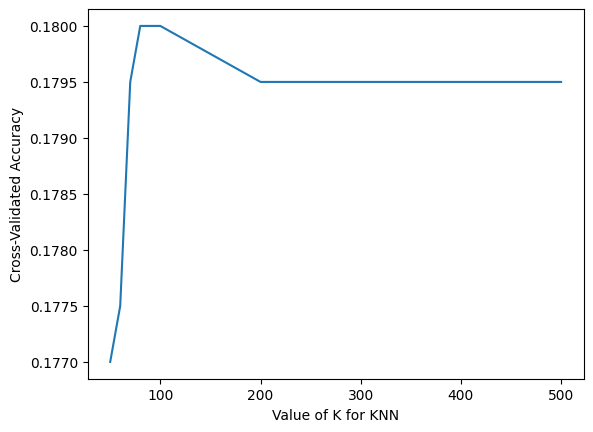

In [112]:
k_range = [50, 60, 70, 80, 90, 100, 200, 500]
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

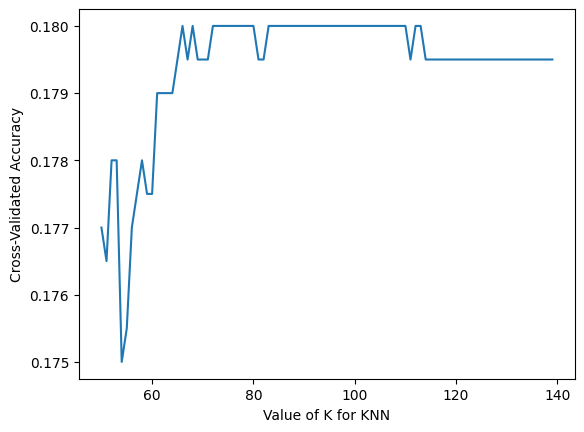

In [122]:
k_range = list(range(50, 140))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [147]:
# Find the maximum accuracy score
max_score = max(scores)

# Find the index (position) of the maximum score
max_index = scores.index(max_score)

# Find the corresponding value of K for the peak
peak_k_value = k_range[max_index]

peak_indices = [i for i, score in enumerate(scores) if score == max_score]
peak_k_values = [k_range[index] for index in peak_indices]

print("best performing K-values:", peak_k_values)

best performing K-values: [66, 68, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113]


In [154]:
import pandas as pd

df_peak_values = pd.DataFrame({'K_values': peak_k_values, 'Accuracy': [scores[k_range.index(peak_k_value)] for peak_k_value in peak_k_values]})

df_peak_values.transpose()


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
K_values,66.0000,68.0000,72.0000,73.0000,74.0000,75.0000,76.0000,77.0000,78.0000,79.0000,...,103.0000,104.0000,105.0000,106.0000,107.0000,108.0000,109.0000,110.0000,112.0000,113.0000
Accuracy,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,...,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800,0.1800


### 2.3 Cross validation

In [152]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Fold Cross-Validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=100)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.212 0.2   0.184 0.174 0.196 0.17  0.192 0.197 0.187 0.172]
Mean Accuracy: 0.18839999999999998
Standard Deviation of Accuracy: 0.012932130528261771


## 3. Train a SVM

In [156]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [177]:
# Initialize SVM classifier (you can choose the kernel and hyperparameters)
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 0.0001)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.1795


### 3.1 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


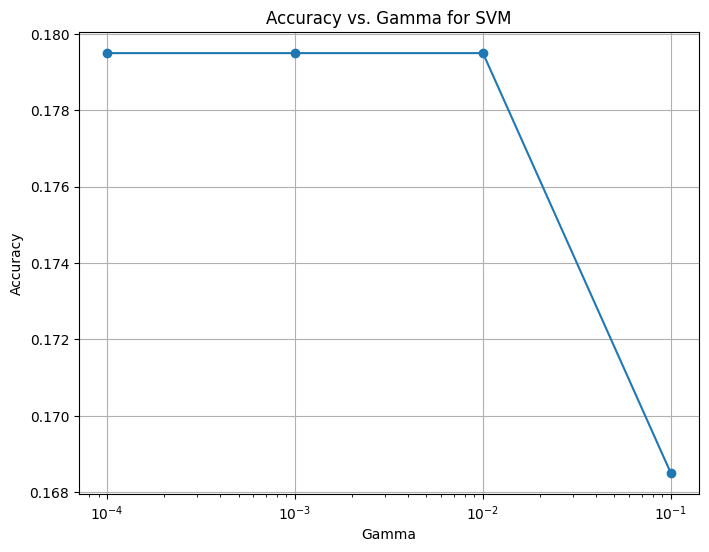

In [166]:
# Define gamma values to try
gamma_values = [0.0001, 0.001, 0.01, 0.1]

# Initialize lists to store gamma values and corresponding accuracies
gamma_list = []
accuracy_list = []

# Train SVM models with different gamma values
for gamma in gamma_values:
    svm_clf = SVC(kernel='rbf', gamma=gamma)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    gamma_list.append(gamma)
    accuracy_list.append(accuracy)

# Plot the accuracy vs. gamma
plt.figure(figsize=(8, 6))
plt.plot(gamma_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Gamma for SVM')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization if gamma values are large
plt.grid(True)
plt.show()

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


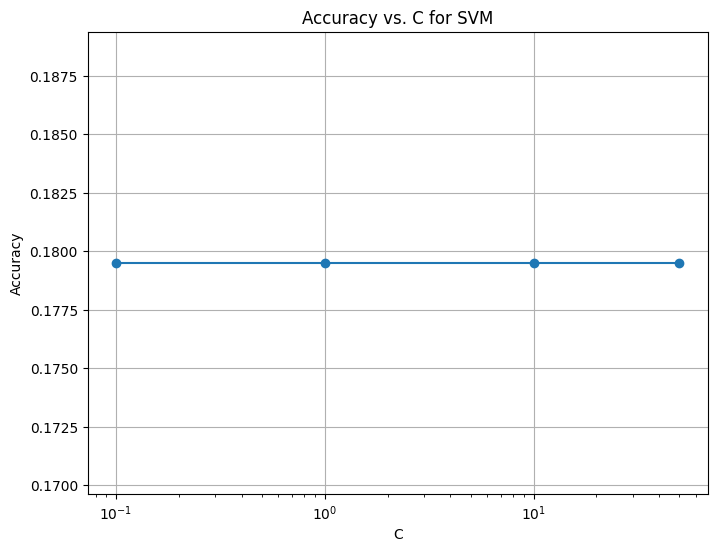

In [170]:
C_values = [0.1, 1, 10, 50]

C_list = []
accuracy_list = []

# Train SVM models with different C and gamma values
for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, gamma=0.001)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    C_list.append(C)
    accuracy_list.append(accuracy)

# Plot the accuracy vs. gamma
plt.figure(figsize=(8, 6))
plt.plot(C_list, accuracy_list, marker='o')
plt.title('Accuracy vs. C for SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization if gamma values are large
plt.grid(True)
plt.show()

### 3.2 Cross validation

In [175]:
# Assuming X_train and y_train are your training data and labels
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 0.0001)  # Initialize SVM model

# Perform cross-validation with 5-fold cross-validation
cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Cross-Validation Scores: [0.19125 0.19125 0.19125 0.19    0.19    0.19    0.19    0.19    0.19
 0.19125]
Mean Accuracy: 0.19049999999999997
Standard Deviation of Accuracy: 0.000612372435695795
